In [1]:
# 逻辑回归
# 逻辑回归介绍   https://zhuanlan.zhihu.com/p/74874291
# Kaggle页面
# https://www.kaggle.com/c/GiveMeSomeCredit/overview

In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 读取相关数据
sampleEntry = pd.read_csv('./data/GiveMeSomeCredit/sampleEntry.csv')
df = pd.read_csv('./data/GiveMeSomeCredit/cs-training.csv')
test = pd.read_csv('./data/GiveMeSomeCredit/cs-test.csv')

In [4]:
# 下面来看一下这些数据

In [5]:
sampleEntry.describe()

,Id,Probability
count,101503.000000,101503.000000
mean,50752.000000,0.067664
std,29301.536524,0.110445
min,1.000000,0.003513
25%,25376.500000,0.011705
50%,50752.000000,0.023285
75%,76127.500000,0.067193
max,101503.000000,0.826056


In [6]:
sampleEntry.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [7]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [8]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [9]:
test.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [10]:
test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [11]:
print(sampleEntry.shape)
print(df.shape)
print(test.shape)

(101503, 2)
(150000, 12)
(101503, 12)


In [12]:
# 将Unnamed、SeriousDlqin2yrs两列重命名
# DataFrame.rename() 对指定行或者列重命名   
# https://vimsky.com/examples/usage/python-pandas-dataframe-rename.html
df.rename(columns={'Unnamed: 0':'Id', 'SeriousDlqin2yrs':'Default'}, inplace=True)

In [13]:
test.rename(columns={'Unnamed: 0':'Id', 'SeriousDlqin2yrs':'Default'}, inplace=True)

In [14]:
df.isnull().sum()# 判断并统计每一列的缺失值

Id                                          0
Default                                     0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [15]:
test.isnull().sum()

Id                                           0
Default                                 101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [16]:
# 将缺失值填充为对应列的平均值
# 每月收入 家属人数两列
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(),inplace=True)
df['NumberOfDependents'].fillna(test['NumberOfDependents'].mode()[0], inplace=True)

In [17]:
# 检查一下
df.isnull().sum()

Id                                      0
Default                                 0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [18]:
test['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(),inplace=True)
test['NumberOfDependents'].fillna(test['NumberOfDependents'].mode()[0], inplace=True)

In [19]:
# 检查一下
test.isnull().sum()

Id                                           0
Default                                 101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

In [20]:
import seaborn as sns# 统计数据的可视化库

<AxesSubplot:>

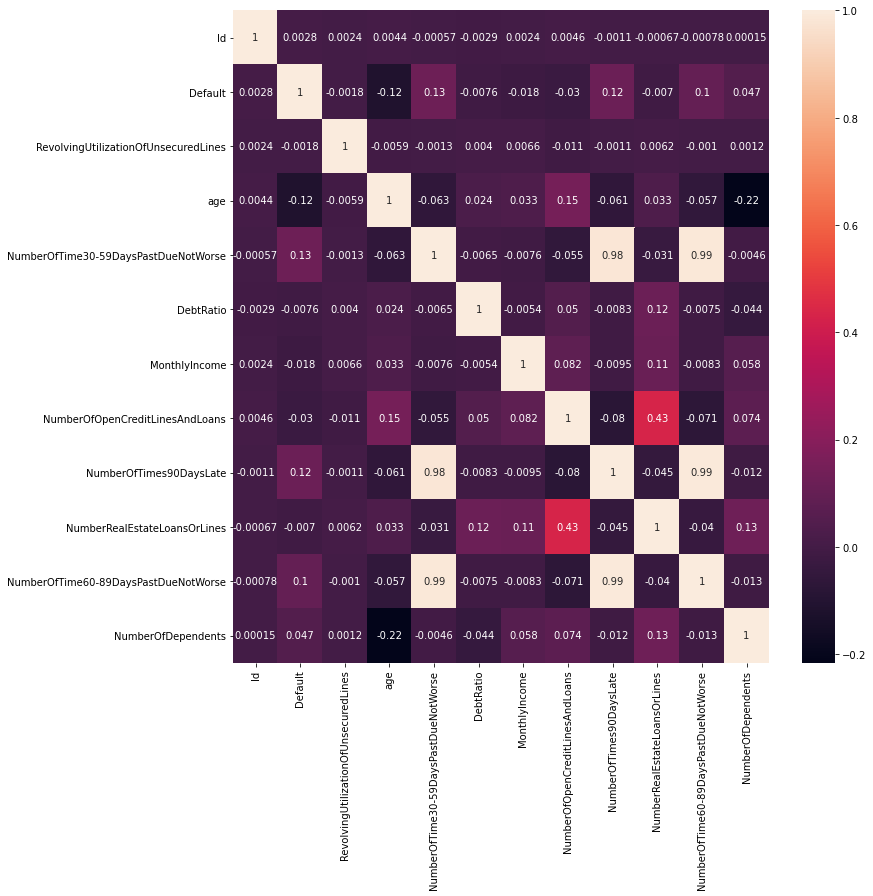

In [21]:
cor = df.corr()# 相关性系数  https://blog.csdn.net/qq_40946639/article/details/102984166
fig, ax = plt.subplots(figsize=(12, 12))
# seaborn.heatmap  https://www.cntofu.com/book/172/docs/30.md  
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True, ax=ax)

Percentage of People Who Defaulted: 6.684%


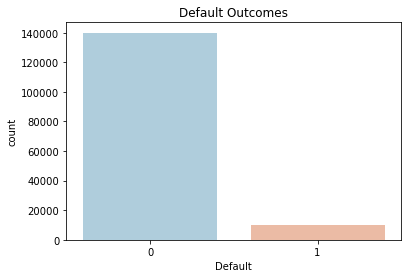

In [22]:
# sns.countplot()  https://cloud.tencent.com/developer/article/1511150
sns.countplot(x='Default', data=df, palette='RdBu_r')# 以bar的形式展示每个类别的数量
plt.title('Default Outcomes')
print("Percentage of People Who Defaulted: {}%".format(df["Default"].sum()*100 / len(df)))

Text(0.5, 1.0, 'Distribuition of Default Rate by Age')

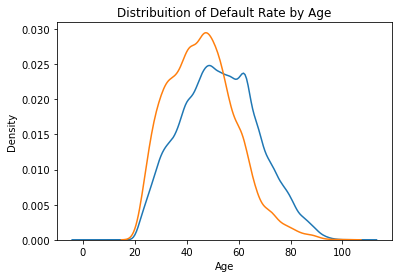

In [23]:
# sns.kdeplot() 核密度估计图  https://www.cnblogs.com/cgmcoding/p/13384442.html
sns.kdeplot(df.loc[df["Default"] == 0]["age"], label="Not in Default")
sns.kdeplot(df.loc[df["Default"] == 1]["age"], label="In Default")
plt.xlabel('Age')
plt.title('Distribuition of Default Rate by Age')

E:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

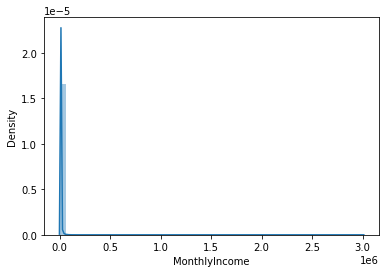

In [24]:
# sns.distplot()   http://seaborn.pydata.org/generated/seaborn.distplot.html
sns.distplot(df.MonthlyIncome)

In [25]:
# 选择特征
import statsmodels.formula.api as sm
#  statsmodels（http://www.statsmodels.org）是一个Python库，用于拟合多种统计模型，执行统计测试以及数据探索和可视化。statsmodels包含更多的“经典”频率学派统计方法，而贝叶斯方法和机器学习模型可在其他库中找到。

def vif_cal(input_data, dependent_col):
    x_vars = input_data.drop([dependent_col], axis=1)# 删除指定列
    xvar_names = x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y = x_vars[xvar_names[i]] 
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif = round(1/(1-rsq),2)
        print(xvar_names[i], " VIF = " , vif)
        
#计算 VIF 值   VIF方差膨胀系数
vif_cal(input_data=df, dependent_col="Default")

Id  VIF =  1.0
RevolvingUtilizationOfUnsecuredLines  VIF =  1.0
age  VIF =  1.09
NumberOfTime30-59DaysPastDueNotWorse  VIF =  40.87
DebtRatio  VIF =  1.02
MonthlyIncome  VIF =  1.02
NumberOfOpenCreditLinesAndLoans  VIF =  1.28
NumberOfTimes90DaysLate  VIF =  73.1
NumberRealEstateLoansOrLines  VIF =  1.27
NumberOfTime60-89DaysPastDueNotWorse  VIF =  91.34
NumberOfDependents  VIF =  1.08


In [23]:
# sklearn实现版本 

In [24]:
from sklearn.model_selection import train_test_split# 将指定数据分割为测试样本和训练样本
from sklearn.linear_model import LogisticRegression# 逻辑回归  https://blog.csdn.net/u013597931/article/details/79967426 
# sklearn中的classification_report函数用于显示主要分类指标的文本报告．在报告中显示每个类的精确度，召回率，F1值等信息。
# https://blog.csdn.net/akadiao/article/details/78788864
from sklearn.metrics import classification_report
# https://blog.csdn.net/hlang8160/article/details/78040311
from sklearn.metrics import confusion_matrix,accuracy_score# 混淆矩阵 分类准确率分数

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [26]:
# 将数据分为训练集、测试集
features=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents']
dep=['Default']
x=df[features]
y=df[dep]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


#
scaler = StandardScaler()# 数据标准化 
scaler.fit(x_train.fillna(0))
#sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'))
sel_.fit(scaler.transform(x_train.fillna(0)), y_train)
sel_.get_support()

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [27]:
# splitting data into train and test set
from sklearn.feature_selection import SelectFromModel

features=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','MonthlyIncome','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents']
dep=['Default']
x=df[features]
y=df[dep]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
import sklearn.metrics as metrics

# implementing model and scoring
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.93      1.00      0.97     42012
           1       0.48      0.01      0.03      2988

    accuracy                           0.93     45000
   macro avg       0.70      0.51      0.50     45000
weighted avg       0.90      0.93      0.90     45000

Accuracy: 0.9335111111111111


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

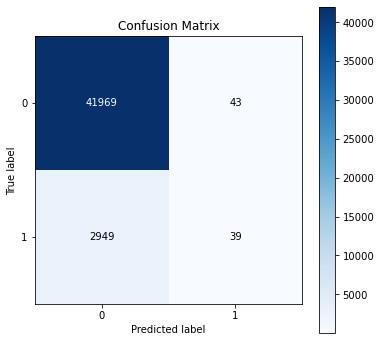

In [29]:
import scikitplot as skplt# pip install scikit-plot
skplt.metrics.plot_confusion_matrix(y_test,predictions,figsize=(6,6))

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Random Classifier: ROC AUC=0.500
Logistic: ROC AUC=0.652


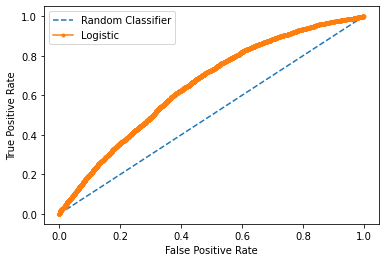

In [30]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
features=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome']
dep=['Default']
x=df[features]
y=df[dep]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
# fit a model
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = logmodel.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random Classifier: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classifier')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [26]:
# 使用PyTorch

In [27]:
# 获取训练集和测试集
features=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents']
dep=['Default']
allfeatures = ['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents','Default']
alldata = df[allfeatures]

In [28]:
alldata.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,Default
count,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,353.005076,6.670221e+03,8.452760,1.018240,0.737413,0.066840
std,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,2037.818523,1.288045e+04,5.145951,1.129771,1.107021,0.249746
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.903000e+03,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,6.600000e+03,0.366508,6.600000e+03,8.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,7.400000e+03,0.868254,7.400000e+03,11.000000,2.000000,1.000000,0.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,329664.000000,3.008750e+06,58.000000,54.000000,20.000000,1.000000


In [29]:
alldata.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,Default
0,0.766127,45,2,0.802982,9120.0,0.802982,9120.0,13,6,2.0,1
1,0.957151,40,0,0.121876,2600.0,0.121876,2600.0,4,0,1.0,0
2,0.658180,38,1,0.085113,3042.0,0.085113,3042.0,2,0,0.0,0
3,0.233810,30,0,0.036050,3300.0,0.036050,3300.0,5,0,0.0,0
4,0.907239,49,1,0.024926,63588.0,0.024926,63588.0,7,1,0.0,0


In [30]:
# 数据归一化
means, stds = dict(), dict()

In [31]:
for col in features:
    means[col] = alldata[col].mean()
    stds[col] = alldata[col].std()

In [32]:
means

{'RevolvingUtilizationOfUnsecuredLines': 6.04843805466686,
 'age': 52.295206666666665,
 'NumberOfTime30-59DaysPastDueNotWorse': 0.4210333333333333,
 'DebtRatio': DebtRatio    353.005076
 DebtRatio    353.005076
 dtype: float64,
 'MonthlyIncome': MonthlyIncome    6670.221237
 MonthlyIncome    6670.221237
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': 8.45276,
 'NumberRealEstateLoansOrLines': 1.01824,
 'NumberOfDependents': 0.7374133333333334}

In [33]:
stds

{'RevolvingUtilizationOfUnsecuredLines': 249.75537062543177,
 'age': 14.77186586310081,
 'NumberOfTime30-59DaysPastDueNotWorse': 4.192781272017265,
 'DebtRatio': DebtRatio    2037.818523
 DebtRatio    2037.818523
 dtype: float64,
 'MonthlyIncome': MonthlyIncome    12880.445756
 MonthlyIncome    12880.445756
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': 5.145950989645247,
 'NumberRealEstateLoansOrLines': 1.1297709848819713,
 'NumberOfDependents': 1.1070214146373256}

In [34]:
for col in features:
    alldata[col] = (alldata[col] - means[col]) / stds[col]

<ipython-input-34-f5e2989d0689>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata[col] = (alldata[col] - means[col]) / stds[col]


In [35]:
alldata.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,Default
count,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000
mean,1.447451e-16,-3.407534e-16,-2.431625e-15,-0.173227,-0.517856,-0.173227,-0.517856,-1.235163e-16,2.505314e-15,5.679812e-16,0.066840
std,1.000000e+00,1.000000e+00,1.000000e+00,0.000491,0.000078,0.000491,0.000078,1.000000e+00,1.000000e+00,1.000000e+00,0.249746
min,-2.421745e-02,-3.540190e+00,-1.004186e-01,-0.173312,-0.517897,-0.173312,-0.517897,-1.642604e+00,-9.012800e-01,-6.661238e-01,0.000000
25%,-2.409786e-02,-7.646432e-01,-1.004186e-01,-0.173312,-0.517873,-0.173312,-0.517873,-6.709664e-01,-9.012800e-01,-6.661238e-01,0.000000
50%,-2.360012e-02,-1.998439e-02,-1.004186e-01,-0.173312,-0.517857,-0.173312,-0.517857,-8.798374e-02,-1.614486e-02,-6.661238e-01,0.000000
75%,-2.197907e-02,7.246744e-01,-1.004186e-01,-0.173312,-0.517852,-0.173312,-0.517852,4.949989e-01,8.689903e-01,2.372011e-01,0.000000
max,2.030065e+02,3.838702e+00,2.327309e+01,-0.093927,-0.499761,-0.093927,-0.499761,9.628393e+00,4.689602e+01,1.740037e+01,1.000000


In [36]:
alldata.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,Default
0,-0.021150,-0.493858,0.376592,-0.173312,-0.517842,-0.173312,-0.517842,0.883654,4.409531,1.140526,1
1,-0.020385,-0.832339,-0.100419,-0.173312,-0.517881,-0.173312,-0.517881,-0.865294,-0.901280,0.237201,0
2,-0.021582,-0.967732,0.138087,-0.173312,-0.517878,-0.173312,-0.517878,-1.253949,-0.901280,-0.666124,0
3,-0.023281,-1.509302,-0.100419,-0.173312,-0.517877,-0.173312,-0.517877,-0.670966,-0.901280,-0.666124,0
4,-0.020585,-0.223073,0.138087,-0.173312,-0.517513,-0.173312,-0.517513,-0.282311,-0.016145,-0.666124,0


In [37]:
x=alldata[features]
y=alldata[dep]

In [38]:
x.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,DebtRatio,MonthlyIncome,MonthlyIncome,DebtRatio,DebtRatio,MonthlyIncome,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,-0.021150,-0.493858,0.376592,-0.173312,-0.173312,-0.517842,-0.517842,-0.173312,-0.173312,-0.517842,-0.517842,0.883654,4.409531,1.140526
1,-0.020385,-0.832339,-0.100419,-0.173312,-0.173312,-0.517881,-0.517881,-0.173312,-0.173312,-0.517881,-0.517881,-0.865294,-0.901280,0.237201
2,-0.021582,-0.967732,0.138087,-0.173312,-0.173312,-0.517878,-0.517878,-0.173312,-0.173312,-0.517878,-0.517878,-1.253949,-0.901280,-0.666124
3,-0.023281,-1.509302,-0.100419,-0.173312,-0.173312,-0.517877,-0.517877,-0.173312,-0.173312,-0.517877,-0.517877,-0.670966,-0.901280,-0.666124
4,-0.020585,-0.223073,0.138087,-0.173312,-0.173312,-0.517513,-0.517513,-0.173312,-0.173312,-0.517513,-0.517513,-0.282311,-0.016145,-0.666124


In [39]:
y.head()

,Default
0,1
1,0
2,0
3,0
4,0


In [40]:
print(x.shape)
print(y.shape)

(150000, 14)
(150000, 1)


In [41]:
import torch
import torch.nn as nn

In [42]:
class Net(nn.Module):
    def __init__(self, D_in, D_out):
        super(Net, self).__init__()
        self.logic = nn.Linear(D_in, D_out)
        self.sigmod = nn.Sigmoid()
        
    def forward(self, x):
        y = self.sigmod(self.logic(x))
        return y

In [43]:
# 总共150000组数据分为训练集和测试集 按照7：3划分
train_size = int(x.shape[0] * 0.7)
test_size = x.shape[0] - train_size
print(train_size, test_size)

105000 45000


In [44]:
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size - 1:-1]
y_test = y[train_size - 1:-1]

In [45]:
print(len(x_train), len(x_test))

105000 45000


In [46]:
# 用没有归一化的数据对模型进行训练

# 将数据转化为Tensor
x_train = torch.tensor(x_train.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
x_test = torch.tensor(x_test.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float)

In [47]:
x_train.shape

torch.Size([105000, 14])

In [48]:
D_in, D_out = 14, 2

In [49]:
model1 = Net(D_in, D_out)

In [50]:
model1

Net(
  (logic): Linear(in_features=14, out_features=2, bias=True)
  (sigmod): Sigmoid()
)

In [51]:
# 损失函数
criterion = nn.MSELoss()

In [52]:
# 优化器
optimizer = torch.optim.SGD(model1.parameters(), lr=0.1)

In [53]:
losses1 = []

for t in range(500):
    y_pred = model1(x_train)
    
    loss = criterion(y_pred, y_train)
    print(t, loss.item())
    losses1.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

E:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([105000, 1])) that is different to the input size (torch.Size([105000, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 0.2906177043914795
1 0.285077303647995
2 0.2796398103237152
3 0.2743070125579834
4 0.269080251455307
5 0.2639607787132263
6 0.2589494287967682
7 0.25404688715934753
8 0.24925357103347778
9 0.24456964433193207
10 0.23999501764774323
11 0.23552942276000977
12 0.23117241263389587
13 0.22692328691482544
14 0.2227811962366104
15 0.21874508261680603
16 0.21481384336948395
17 0.21098613739013672
18 0.20726054906845093
19 0.20363545417785645
20 0.20010928809642792
21 0.1966802477836609
22 0.1933465600013733
23 0.19010627269744873
24 0.1869574636220932
25 0.18389813601970673
26 0.1809263378381729
27 0.17803992331027985
28 0.17523683607578278
29 0.17251500487327576
30 0.16987235844135284
31 0.1673068106174469
32 0.1648162603378296
33 0.16239866614341736
34 0.16005195677280426
35 0.1577741503715515
36 0.15556319057941437
37 0.1534171849489212
38 0.15133415162563324
39 0.14931222796440125
40 0.1473495215177536
41 0.14544425904750824
42 0.14359459280967712
43 0.14179882407188416
44 0.140055269002

386 0.06479152292013168
387 0.06477604061365128
388 0.06476065516471863
389 0.06474537402391434
390 0.0647301971912384
391 0.06471510976552963
392 0.06470013409852982
393 0.06468524783849716
394 0.06467047333717346
395 0.06465578079223633
396 0.06464119255542755
397 0.06462669372558594
398 0.06461228430271149
399 0.0645979791879654
400 0.06458376348018646
401 0.0645696371793747
402 0.06455560028553009
403 0.06454166769981384
404 0.06452780961990356
405 0.06451404094696045
406 0.0645003616809845
407 0.06448677182197571
408 0.06447326391935349
409 0.06445985287427902
410 0.06444650888442993
411 0.0644332617521286
412 0.06442008912563324
413 0.06440700590610504
414 0.06439400464296341
415 0.06438107043504715
416 0.06436823308467865
417 0.06435547024011612
418 0.06434278935194016
419 0.06433018296957016
420 0.06431765109300613
421 0.06430520862340927
422 0.06429282575845718
423 0.06428053230047226
424 0.0642683133482933
425 0.06425615400075912
426 0.06424408406019211
427 0.0642320811748504

In [63]:
model2 = Net(D_in, D_out)
# 优化器
optimizer = torch.optim.SGD(model2.parameters(), lr=0.01)

losses2 = []

for t in range(5000):
    y_pred = model2(x_train)
    
    loss = criterion(y_pred, y_train)
    if t % 100 == 0:
        print(t, loss.item())
    losses1.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

E:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([105000, 1])) that is different to the input size (torch.Size([105000, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 0.2642996609210968
100 0.21724724769592285
200 0.18176718056201935
300 0.15559902787208557
400 0.1363595575094223
500 0.12209583073854446
600 0.11136951297521591
700 0.10316835343837738
800 0.09679049253463745
900 0.0917489230632782
1000 0.08770252019166946
1100 0.08440922945737839
1200 0.08169466257095337
1300 0.07943129539489746
1400 0.07752449065446854
1500 0.07590292394161224
1600 0.07451214641332626
1700 0.07331006228923798
1800 0.07226377725601196
1900 0.07134724408388138
2000 0.07053963094949722
2100 0.06982417404651642
2200 0.06918720155954361
2300 0.06861750036478043
2400 0.06810583174228668
2500 0.06764446943998337
2600 0.06722694635391235
2700 0.06684780865907669
2800 0.06650244444608688
2900 0.06618691235780716
3000 0.06589784473180771
3100 0.06563231348991394
3200 0.06538781523704529
3300 0.06516215950250626
3400 0.06495343893766403
3500 0.0647599995136261
3600 0.06458035856485367
3700 0.06441323459148407
3800 0.06425748020410538
3900 0.06411207467317581
4000 0.063976123

In [54]:
# 用分出来的数据测试一下model1的准确率
preds = model1(x_test)
print(preds.shape)

torch.Size([45000, 2])


In [55]:
print(preds[:10])

tensor([[0.1006, 0.0983],
        [0.1132, 0.1009],
        [0.0913, 0.0975],
        [0.1188, 0.1059],
        [0.1023, 0.0980],
        [0.1013, 0.1048],
        [0.0971, 0.0981],
        [0.1164, 0.0962],
        [0.1173, 0.1325],
        [0.1205, 0.1098]], grad_fn=<SliceBackward>)


In [56]:
print(y_test[:10])

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])


In [58]:
_, ys = torch.max(preds, 1)
print(ys.shape)

torch.Size([45000])


In [59]:
print(ys[:10])

tensor([0, 0, 1, 0, 0, 1, 1, 0, 1, 0])


In [62]:
right = 0.0
for i in range(len(ys)):
    if ys[i] == y_test[i]:
        right += 1
acc = right / len(ys)
print(acc)

0.5410888888888888


In [64]:
preds = model2(x_test)
print(preds.shape)
_, ys = torch.max(preds, 1)
print(ys.shape)
right = 0.0
for i in range(len(ys)):
    if ys[i] == y_test[i]:
        right += 1
acc = right / len(ys)
print(acc)

torch.Size([45000, 2])
torch.Size([45000])
0.45537777777777777


In [73]:
class MulNet(nn.Module):
    def __init__(self):# 输入维度14 输出维度2
        super(MulNet, self).__init__()
        self.l1 = nn.Linear(14, 140)
        self.l2 = nn.Linear(140, 140)
        self.l3 = nn.Linear(140, 2)
        self.sigmod = nn.Sigmoid()
        
    def forward(self, x):
        y = self.l1(x)
        y = self.l2(y)
        y = self.l3(y)
        return self.sigmod(y)

In [77]:
model3 = MulNet()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=0.01)

In [78]:
for t in range(500):
    y_pred = model3(x_train)
    
    loss = criterion(y_pred, y_train)
    if (t + 1) % 10 == 0:
        print(t, loss.item())
    losses1.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

E:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([105000, 1])) that is different to the input size (torch.Size([105000, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


9 0.26426613330841064
19 0.24677835404872894
29 0.23098362982273102
39 0.21666239202022552
49 0.20363378524780273
59 0.19174979627132416
69 0.18088917434215546
79 0.17095163464546204
89 0.16185317933559418
99 0.15352196991443634
109 0.14589543640613556
119 0.1389177143573761
129 0.13253812491893768
139 0.12670989334583282
149 0.12138950824737549
159 0.11653617769479752
169 0.11211156845092773
179 0.1080796867609024
189 0.10440683364868164
199 0.10106151551008224
209 0.0980144515633583
219 0.09523852169513702
229 0.0927087813615799
239 0.09040225297212601
249 0.08829796314239502
259 0.08637678623199463
269 0.08462131768465042
279 0.0830157995223999
289 0.08154597878456116
299 0.08019895851612091
309 0.07896309345960617
319 0.07782793790102005
329 0.07678405195474625
339 0.07582291960716248
349 0.07493693381547928
359 0.0741191878914833
369 0.07336351275444031
379 0.07266434282064438
389 0.072016641497612
399 0.07141589373350143
409 0.07085802406072617
419 0.07033936679363251
429 0.06985

In [79]:
preds = model3(x_test)
print(preds.shape)
_, ys = torch.max(preds, 1)
print(ys.shape)
right = 0.0
for i in range(len(ys)):
    if ys[i] == y_test[i]:
        right += 1
acc = right / len(ys)
print(acc)
# 之前试过学习率设为0.1时 正确率只有0.45

torch.Size([45000, 2])
torch.Size([45000])
0.8359111111111112
